# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 3
shufflePixels = True
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(15000, 32, 32, 3)
(15000, 32, 32, 3)
(15000, 3)
(3000, 32, 32, 3)
(3000, 3)


Populating the interactive namespace from numpy and matplotlib


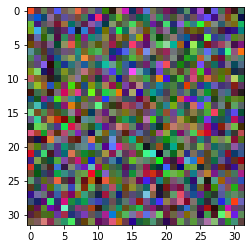

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

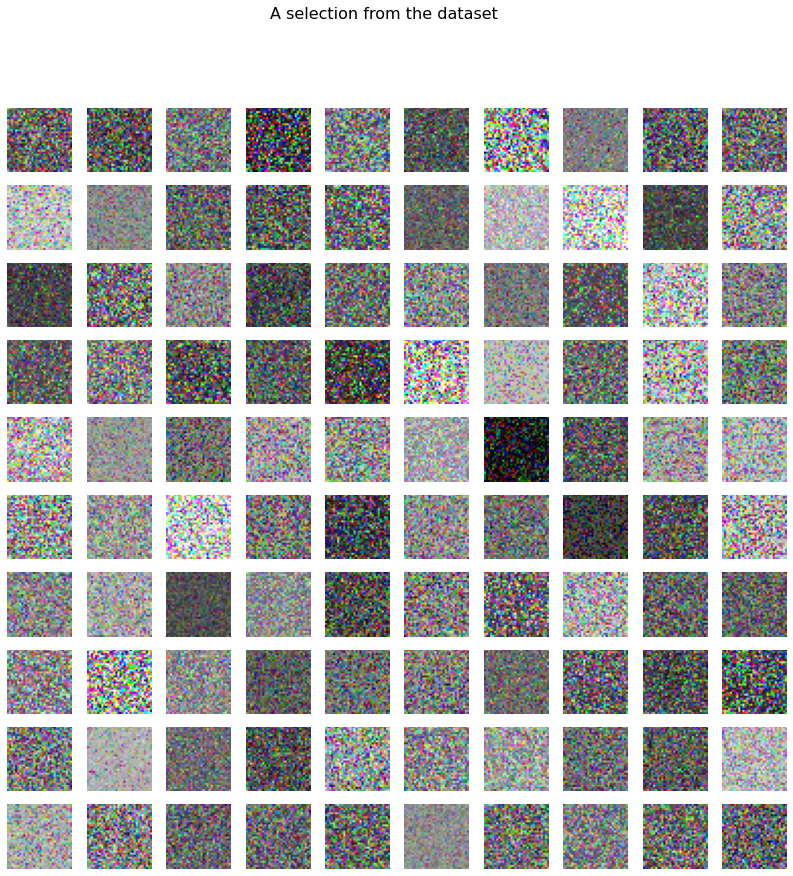

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 10s 45ms/step - loss: 1.1026 - accuracy: 0.3333
test loss, test acc: [1.1025938987731934, 0.3333333432674408]
Evaluate on test data
6/6 [==============================] - 1s 247ms/step - loss: 1.1026 - accuracy: 0.3333
test loss, test acc: [1.1026387214660645, 0.3333333432674408]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 7s 32ms/step - loss: 1.0727 - accuracy: 0.4090 - val_loss: 1.0948 - val_accuracy: 0.3987
Epoch 2/250
150/150 [==============================] - 5s 30ms/step - loss: 1.0292 - accuracy: 0.4635 - val_loss: 1.0086 - val_accuracy: 0.5080
Epoch 3/250
150/150 [==============================] - 5s 30ms/step - loss: 0.9983 - accuracy: 0.4885 - val_loss: 0.9881 - val_accuracy: 0.5410
Epoch 4/250
150/150 [==============================] - 5s 31ms/step - loss: 0.9941 - accuracy: 0.5005 - val_loss: 1.0265 - val_accuracy: 0.4653
Epoch 5/250
150/150 [==============================] - 5s 31ms/step - loss: 0.9876 - accuracy: 0.5103 - val_loss: 0.9947 - val_accuracy: 0.5030
Epoch 6/250
150/150 [==============================] - 5s 30ms/step - loss: 0.9817 - accuracy: 0.5224 - val_loss: 1.0173 - val_accuracy: 0.4913
Epoch 7/250
150/150 [==============================] - 5s 30ms/step - loss: 0.9783 - accuracy: 0.5254 - val_loss: 0.9661 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 30ms/step - loss: 1.8680e-06 - accuracy: 1.0000
test loss, test acc: [1.8679571667234995e-06, 1.0]
Evaluate on test data
6/6 [==============================] - 0s 32ms/step - loss: 6.9956 - accuracy: 0.4337
test loss, test acc: [6.995598793029785, 0.4336666762828827]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 9ms/step - loss: 5.6080 - accuracy: 0.2929
test loss, test acc: [5.608035087585449, 0.2929333448410034]
Evaluate on test data
6/6 [==============================] - 0s 28ms/step - loss: 5.5063 - accuracy: 0.2977
test loss, test acc: [5.506322860717773, 0.29766666889190674]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 2s 8ms/step - loss: 4.8801 - accuracy: 0.3784 - val_loss: 1.0405 - val_accuracy: 0.4570
Epoch 2/250
150/150 [==============================] - 1s 7ms/step - loss: 1.1133 - accuracy: 0.4329 - val_loss: 1.0184 - val_accuracy: 0.4640
Epoch 3/250
150/150 [==============================] - 1s 8ms/step - loss: 1.0293 - accuracy: 0.4533 - val_loss: 0.9987 - val_accuracy: 0.5020
Epoch 4/250
150/150 [==============================] - 1s 7ms/step - loss: 1.0133 - accuracy: 0.4721 - val_loss: 1.0001 - val_accuracy: 0.5063
Epoch 5/250
150/150 [==============================] - 1s 7ms/step - loss: 1.0084 - accuracy: 0.4741 - val_loss: 1.0014 - val_accuracy: 0.4993
Epoch 6/250
150/150 [==============================] - 1s 8ms/step - loss: 1.0053 - accuracy: 0.4748 - val_loss: 1.0092 - val_accuracy: 0.4983
Epoch 7/250
150/150 [==============================] - 1s 7ms/step - loss: 0.9988 - accuracy: 0.4754 - val_loss: 0.9975 - val_accuracy: 0.5027

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8332
test loss, test acc: [0.41554394364356995, 0.8331999778747559]
Evaluate on test data
6/6 [==============================] - 0s 7ms/step - loss: 1.2545 - accuracy: 0.4430
test loss, test acc: [1.254488468170166, 0.4429999887943268]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 3s 47ms/step - loss: 1.5299 - accuracy: 0.3461
test loss, test acc: [1.5299125909805298, 0.3461333215236664]
Evaluate on test data
6/6 [==============================] - 1s 157ms/step - loss: 1.5507 - accuracy: 0.3507
test loss, test acc: [1.5507259368896484, 0.35066667199134827]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 9s 44ms/step - loss: 1.0802 - accuracy: 0.4905 - val_loss: 1.0192 - val_accuracy: 0.4933
Epoch 2/250
150/150 [==============================] - 6s 42ms/step - loss: 0.9071 - accuracy: 0.5775 - val_loss: 0.9675 - val_accuracy: 0.5403
Epoch 3/250
150/150 [==============================] - 6s 40ms/step - loss: 0.8075 - accuracy: 0.6357 - val_loss: 0.9902 - val_accuracy: 0.5483
Epoch 4/250
150/150 [==============================] - 6s 42ms/step - loss: 0.6667 - accuracy: 0.7177 - val_loss: 1.0659 - val_accuracy: 0.5257
Epoch 5/250
150/150 [==============================] - 6s 40ms/step - loss: 0.4950 - accuracy: 0.8088 - val_loss: 1.2184 - val_accuracy: 0.4903
Epoch 6/250
150/150 [==============================] - 6s 40ms/step - loss: 0.3479 - accuracy: 0.8815 - val_loss: 1.3532 - val_accuracy: 0.5220
Epoch 7/250
150/150 [==============================] - 6s 40ms/step - loss: 0.2360 - accuracy: 0.9258 - val_loss: 1.4831 - val_accuracy:

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 40ms/step - loss: 0.0020 - accuracy: 0.9998
test loss, test acc: [0.001986861927434802, 0.9998000264167786]
Evaluate on test data
6/6 [==============================] - 0s 39ms/step - loss: 3.5543 - accuracy: 0.5160
test loss, test acc: [3.5542917251586914, 0.515999972820282]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 4s 68ms/step - loss: 2.3810 - accuracy: 0.3333
test loss, test acc: [2.3809568881988525, 0.3333333432674408]
Evaluate on test data
6/6 [==============================] - 2s 401ms/step - loss: 2.3980 - accuracy: 0.3333
test loss, test acc: [2.3979504108428955, 0.3333333432674408]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
150/150 [==============================] - 8s 42ms/step - loss: 1.0407 - accuracy: 0.5170 - val_loss: 1.1309 - val_accuracy: 0.3830
Epoch 2/250
150/150 [==============================] - 6s 41ms/step - loss: 0.9423 - accuracy: 0.5524 - val_loss: 0.9400 - val_accuracy: 0.5557
Epoch 3/250
150/150 [==============================] - 6s 39ms/step - loss: 0.9323 - accuracy: 0.5560 - val_loss: 0.9457 - val_accuracy: 0.5617
Epoch 4/250
150/150 [==============================] - 6s 39ms/step - loss: 0.9275 - accuracy: 0.5558 - val_loss: 0.9370 - val_accuracy: 0.5640
Epoch 5/250
150/150 [==============================] - 6s 39ms/step - loss: 0.9260 - accuracy: 0.5609 - val_loss: 0.9450 - val_accuracy: 0.5480
Epoch 6/250
150/150 [==============================] - 6s 39ms/step - loss: 0.9237 - accuracy: 0.5597 - val_loss: 0.9228 - val_accuracy: 0.5717
Epoch 7/250
150/150 [==============================] - 6s 41ms/step - loss: 0.9197 - accuracy: 0.5611 - val_loss: 0.9466 - val_accuracy:

In [27]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
30/30 [==============================] - 1s 46ms/step - loss: 0.0027 - accuracy: 0.9986
test loss, test acc: [0.0026855100877583027, 0.9986000061035156]
Evaluate on test data
6/6 [==============================] - 0s 46ms/step - loss: 3.4024 - accuracy: 0.5113
test loss, test acc: [3.4024195671081543, 0.5113333463668823]


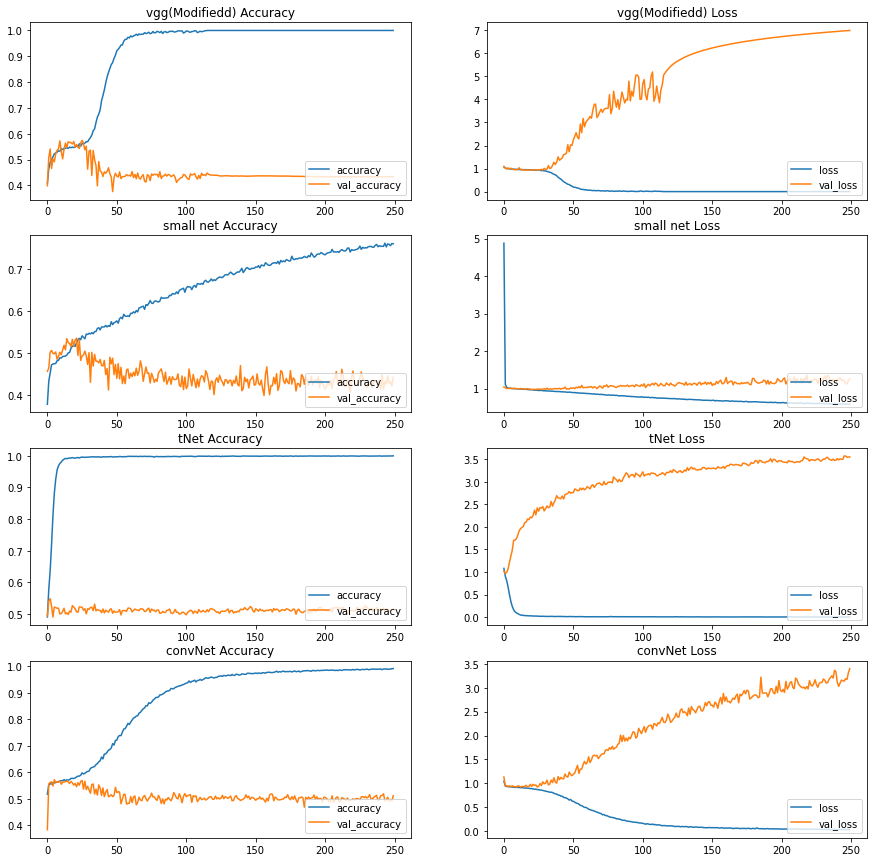

In [28]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
